In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords, wordnet
from sklearn.model_selection import train_test_split
from textblob import TextBlob

from sklearn.linear_model import LinearRegression

In [2]:
file = open('sample.json', "r")
  
# Reading from file
data = json.loads(file.read())

exapmple = data[0]
column_names = exapmple.keys()  

In [3]:
print(column_names)


dict_keys(['ID', 'DOI', 'Title', 'publication_year', 'HostVenue', 'Type', 'OpenAccess', 'Concepts', 'ReferencedWork', 'CitedByYear', 'Abstract'])


In [4]:
result = list(filter(lambda x: (x['publication_year'] >=2010 and x['publication_year'] <2017 ), data))

In [5]:

def get_final_sum(paper):
    """Getting number of citations in first 5 years"""
    return sum([i['cited_by_count'] for imes  in  paper['counts_by_year'][-5:]])


In [6]:
### getting number of citations later this will be used y dependant 
y = list(map(get_final_sum,result))

KeyError: 'counts_by_year'

In [53]:

def get_page_counts(paper):
    """Getting number of citations in first 5 years"""
    try:
        lsp = int(paper['biblio']['last_page'])
        fsp = int(paper['biblio']['first_page'])
        result = lsp - fsp+1
    except:
        result = np.nan
    return result

page_counts = list(map(get_page_counts,result))


In [54]:
#flattening json
df = pd.json_normalize(result)

In [55]:
#page counts
df['page_counts'] = page_counts
df.head()


id  \
0  https://openalex.org/W2396930286   
1  https://openalex.org/W2073714811   
2  https://openalex.org/W2317806057   
3  https://openalex.org/W1975684947   
4  https://openalex.org/W2085172778   

                                                 doi  \
0             https://doi.org/10.1002/cmdc.201600182   
1                  https://doi.org/10.1063/1.4724190   
2                  https://doi.org/10.1021/jp110942e   
3  https://doi.org/10.1016/j.ijheatmasstransfer.2...   
4  https://doi.org/10.1016/j.ijheatmasstransfer.2...   

                                               title  \
0  A BOILED-Egg To Predict Gastrointestinal Absor...   
1  Structured surfaces for enhanced pool boiling ...   
2  Graphene Dispersion and Exfoliation in Low Boi...   
3  Boiling heat transfer on superhydrophilic, sup...   
4  Lattice Boltzmann modeling of boiling heat tra...   

                                        display_name  relevance_score  \
0  A BOILED-Egg To Predict Gastrointestinal Absor...        777.30524   
1  Structured surfaces for enhanced pool boiling ...        622.33550   
2  Graphene Dispersion and Exfoliation in Low Boi...        621.71484   
3  Boiling heat transfer on superhydrophilic, sup...        596.45917   
4  Lattice Boltzmann modeling of boiling heat tra...        564.21857   

   publication_year publication_date             type  \
0              2016       2016-06-06  journal-article   
1              2012       2012-06-11  journal-article   
2              2011       2011-03-14  journal-article   
3              2013       2013-02-01  journal-article   
4              2015       2015-06-01  journal-article   

                                         authorships  cited_by_count  ...  \
0  [{'author_position': 'first', 'author': {'id':...             740  ...   
1  [{'author_position': 'first', 'author': {'id':...             398  ...   
2  [{'author_position': 'first', 'author': {'id':...             400  ...   
3  [{'author_position': 'first', 'author': {'id':...             360  ...   
4  [{'author_position': 'first', 'author': {'id':...             222  ...   

   abstract_inverted_index.state). abstract_inverted_index.boiling-meter,  \
0                              NaN                                    NaN   
1                              NaN                                    NaN   
2                              NaN                                    NaN   
3                              NaN                                    NaN   
4                              NaN                                    NaN   

  abstract_inverted_index.boiling-meter  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  abstract_inverted_index.boiling-meter. abstract_inverted_index.evolutions.  \
0                                    NaN                                 NaN   
1                                    NaN                                 NaN   
2                                    NaN                                 NaN   
3                                    NaN                                 NaN   
4                                    NaN                                 NaN   

  abstract_inverted_index.multi... abstract_inverted_index.(Ra):  \
0                              NaN                           NaN   
1                              NaN                           NaN   
2                              NaN                           NaN   
3                              NaN                           NaN   
4                              NaN                           NaN   

  abstract_inverted_index.worsen abstract_inverted_index.obviously;  \
0                            NaN                                NaN   
1                            NaN                                NaN   
2                            NaN                      

In [123]:
necessary_columns =['title', 'publication_year', 'host_venue.publisher', 'type',
       'open_access.is_oa','id','doi']

In [124]:
dataframe = df[necessary_columns]#filtering the data

In [58]:
dataframe.drop(columns=['id','doi'],inplace=True)

/var/folders/v2/f452_l_j6_n07qbj04wyrfv80000gn/T/ipykernel_81304/3707773490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.drop(columns=['id','doi'],inplace=True)


In [59]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.9,return_categories_list=False):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
        break
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
        return new_column
  #Return only the transformed column if return_categories=False
  else:
        return new_column

In [60]:
print(dataframe.isna().sum())
dataframe['host_venue.publisher']=dataframe['host_venue.publisher'].fillna(dataframe['host_venue.publisher'].mod)
dataframe.isna().sum()

title                     0
publication_year          0
host_venue.publisher    113
type                      9
open_access.is_oa         0
page_counts             785
dtype: int64


/var/folders/v2/f452_l_j6_n07qbj04wyrfv80000gn/T/ipykernel_81304/3371217923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['host_venue.publisher']=dataframe['host_venue.publisher'].fillna(dataframe['host_venue.publisher'].mod)


title                     0
publication_year          0
host_venue.publisher      0
type                      9
open_access.is_oa         0
page_counts             785
dtype: int64

In [61]:

temp = dataframe['host_venue.publisher'].copy()
dataframe['host_venue.publisher'] = cumulatively_categorise(temp)
del temp


/var/folders/v2/f452_l_j6_n07qbj04wyrfv80000gn/T/ipykernel_81304/1876663300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['host_venue.publisher'] = cumulatively_categorise(temp)


In [62]:
dataframe['host_venue.publisher'].value_counts()

Elsevier                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1419
Other                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [63]:
#calculate sum of points for each team
# df_groups = dataframe.groupby('host_venue.publisher')['label'].mean()


#create bar plot by group
# df_groups.plot(kind='bar')



# bb_title = "Infrared imaging technology for breast cancer detection - Current status, protocols and new directions"
# pub_year = 2022
# is_oa = False
# type = "journal-article"
# publisher = "Elsevier"


In [64]:
dict_paper = pd.DataFrame({"title":["Infrared imaging technology for breast cancer detection - Current status, protocols and new directions"],
"publication_year":[2017], "host_venue.publisher":["Elsevier"],	"type":["journal-article"],	"open_access.is_oa":[False],"page_counts":[1213146],
"label":[21343]})


In [65]:
dataframe.head()

title  publication_year  \
0  A BOILED-Egg To Predict Gastrointestinal Absor...              2016   
1  Structured surfaces for enhanced pool boiling ...              2012   
2  Graphene Dispersion and Exfoliation in Low Boi...              2011   
3  Boiling heat transfer on superhydrophilic, sup...              2013   
4  Lattice Boltzmann modeling of boiling heat tra...              2015   

            host_venue.publisher             type  open_access.is_oa  \
0                          Wiley  journal-article               True   
1  American Institute of Physics  journal-article              False   
2      American Chemical Society  journal-article              False   
3                       Elsevier  journal-article               True   
4                       Elsevier  journal-article               True   

   page_counts  
0          5.0  
1          1.0  
2          7.0  
3          9.0  
4         10.0

In [66]:
dataframe = pd.concat([dict_paper, dataframe], axis=0)

In [67]:
dataframe.head()

title  publication_year  \
0  Infrared imaging technology for breast cancer ...              2017   
0  A BOILED-Egg To Predict Gastrointestinal Absor...              2016   
1  Structured surfaces for enhanced pool boiling ...              2012   
2  Graphene Dispersion and Exfoliation in Low Boi...              2011   
3  Boiling heat transfer on superhydrophilic, sup...              2013   

            host_venue.publisher             type  open_access.is_oa  \
0                       Elsevier  journal-article              False   
0                          Wiley  journal-article               True   
1  American Institute of Physics  journal-article              False   
2      American Chemical Society  journal-article              False   
3                       Elsevier  journal-article               True   

   page_counts    label  
0    1213146.0  21343.0  
0          5.0      NaN  
1          1.0      NaN  
2          7.0      NaN  
3          9.0      NaN

In [68]:
temp = dataframe['type'].copy()
dataframe['type'] = cumulatively_categorise(temp)
del temp

In [69]:
dataframe.drop(columns=['page_counts'],inplace=True)

In [70]:
len(y)==len(dataframe)
y.insert(0, 2312312)
len(y)==len(dataframe)

True

In [71]:
dataframe.reset_index(inplace=True,drop=True)
dataframe.head()

title  publication_year  \
0  Infrared imaging technology for breast cancer ...              2017   
1  A BOILED-Egg To Predict Gastrointestinal Absor...              2016   
2  Structured surfaces for enhanced pool boiling ...              2012   
3  Graphene Dispersion and Exfoliation in Low Boi...              2011   
4  Boiling heat transfer on superhydrophilic, sup...              2013   

            host_venue.publisher             type  open_access.is_oa    label  
0                       Elsevier  journal-article              False  21343.0  
1                          Wiley  journal-article               True      NaN  
2  American Institute of Physics  journal-article              False      NaN  
3      American Chemical Society  journal-article              False      NaN  
4                       Elsevier  journal-article               True      NaN

In [72]:
dataframe['label'] = y

In [73]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,10))
# dataframe.groupby('host_venue.publisher').label.value_counts().unstack(0).plot.barh(figsize=(20,10))
# plt.show()


In [74]:
dataframe['type'].value_counts(dropna=False)

journal-article    2426
Other               102
Name: type, dtype: int64

In [75]:
dataframe.head()

title  publication_year  \
0  Infrared imaging technology for breast cancer ...              2017   
1  A BOILED-Egg To Predict Gastrointestinal Absor...              2016   
2  Structured surfaces for enhanced pool boiling ...              2012   
3  Graphene Dispersion and Exfoliation in Low Boi...              2011   
4  Boiling heat transfer on superhydrophilic, sup...              2013   

            host_venue.publisher             type  open_access.is_oa    label  
0                       Elsevier  journal-article              False  2312312  
1                          Wiley  journal-article               True      231  
2  American Institute of Physics  journal-article              False      117  
3      American Chemical Society  journal-article              False      190  
4                       Elsevier  journal-article               True      111

In [76]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.boxplot(x='host_venue.publisher', y='label', data=dataframe)
# plt.xticks(rotation=45)
# plt.show()

In [77]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.boxplot(x='open_access.is_oa', y='label', data=dataframe)
# plt.xticks(rotation=45)
# plt.show()

In [78]:
dataframe.reset_index(inplace=True,drop=True)


In [79]:
our_paper_test = dataframe.iloc[0,~dataframe.columns.isin(["label"])]
our_y = dataframe.iloc[0,dataframe.columns.isin(["label"])]

In [80]:
print(len(dataframe))
dataframe = dataframe.iloc[1:]
# dataframe.reset_index(inplace=True)
print(len(dataframe))

2528
2527


In [81]:
y = y[1:]
len(y)==len(dataframe)


True

In [82]:
X = dataframe.loc[:,~dataframe.columns.isin(["label"])]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
X_test = X_test.append(our_paper_test)
X_test.reset_index(drop=True,inplace=True)

/var/folders/v2/f452_l_j6_n07qbj04wyrfv80000gn/T/ipykernel_81304/949642385.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test = X_test.append(our_paper_test)


In [83]:
y_test.append(6)

In [84]:
y_test

[7,
 15,
 46,
 14,
 24,
 47,
 6,
 25,
 11,
 10,
 12,
 3,
 20,
 17,
 10,
 40,
 18,
 7,
 8,
 16,
 6,
 9,
 41,
 9,
 17,
 23,
 7,
 6,
 7,
 10,
 14,
 12,
 13,
 73,
 19,
 32,
 16,
 9,
 24,
 9,
 11,
 23,
 11,
 4,
 24,
 5,
 7,
 9,
 15,
 7,
 12,
 6,
 9,
 21,
 5,
 6,
 5,
 26,
 7,
 8,
 8,
 8,
 11,
 17,
 6,
 45,
 27,
 56,
 22,
 12,
 6,
 12,
 15,
 7,
 20,
 30,
 6,
 15,
 17,
 14,
 6,
 13,
 12,
 6,
 16,
 6,
 40,
 8,
 9,
 4,
 24,
 34,
 9,
 16,
 6,
 12,
 30,
 5,
 28,
 36,
 33,
 18,
 16,
 16,
 16,
 9,
 8,
 7,
 7,
 8,
 21,
 24,
 14,
 9,
 69,
 9,
 25,
 51,
 23,
 7,
 24,
 29,
 15,
 15,
 8,
 23,
 7,
 14,
 10,
 35,
 7,
 25,
 16,
 21,
 17,
 12,
 10,
 10,
 13,
 7,
 8,
 10,
 7,
 13,
 17,
 7,
 9,
 53,
 10,
 5,
 6,
 6,
 4,
 28,
 11,
 16,
 15,
 14,
 40,
 8,
 7,
 6,
 13,
 16,
 5,
 7,
 35,
 29,
 8,
 5,
 8,
 9,
 8,
 7,
 9,
 12,
 8,
 5,
 6,
 8,
 6,
 12,
 19,
 8,
 12,
 15,
 35,
 5,
 12,
 14,
 9,
 5,
 10,
 7,
 17,
 34,
 8,
 8,
 6,
 9,
 19,
 16,
 25,
 17,
 8,
 9,
 12,
 29,
 25,
 28,
 4,
 13,
 16,
 22,
 10,
 12,
 61,
 13,

In [85]:
def parse(s):
    s = s.replace("cant",r"can't").replace("wheres",r"where's").replace(" i "," I ")
    return str(s[0].upper()) + s[1:]

def clean_text(texts):
    #TextBlos is object which helps to get words and lemmatize them,remove punctuaions and singularize words
    try:
        text=TextBlob(parse(texts))
        #spell = SpellChecker()
        words=text.words
        sw = stopwords.words('english')
        #[spell.correction(i)  if i.islower() else i for i in words]
        new = [i.lower() for i in words if i.lower()]
        cleaned=TextBlob(" ".join(new))
        a=[]
        ## here I will loop twice to lemmatize both verbs and nouns
        for i in cleaned.words:
            a.append(i.lemmatize())
        c=TextBlob(" ".join(a)).words
        return " ".join(c)
    except:
        return texts

In [86]:
X_train['title']=X_train['title'].apply(clean_text)# applying functon on a column
X_test['title']=X_test['title'].apply(clean_text)

In [87]:
#####no nas

In [88]:
# ngram_range=(1)
 
# max_features=

#vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(max_df=0.99, min_df=0.01)
vectorizer.fit(X_train['title'].tolist())
X_tf_train = vectorizer.transform(X_train['title'].tolist())
X_tf_train_df = pd.DataFrame(X_tf_train.toarray(),columns=vectorizer.get_feature_names_out())
X_tf_test = vectorizer.transform(X_test['title'].tolist())
X_tf_test_df = pd.DataFrame(X_tf_test.toarray(),columns=vectorizer.get_feature_names_out())
print(X_tf_train_df.head())

   acid   an  analysis       and  application  approach  aqueous  assessment  \
0   0.0  0.0       0.0  0.200675          0.0       0.0      0.0         0.0   
1   0.0  0.0       0.0  0.000000          0.0       0.0      0.0         0.0   
2   0.0  0.0       0.0  0.147747          0.0       0.0      0.0         0.0   
3   0.0  0.0       0.0  0.180357          0.0       0.0      0.0         0.0   
4   0.0  0.0       0.0  0.333099          0.0       0.0      0.0         0.0   

         at  based  ...  tube  two  under  using  vapor  vertical  \
0  0.000000    0.0  ...   0.0  0.0    0.0    0.0    0.0       0.0   
1  0.000000    0.0  ...   0.0  0.0    0.0    0.0    0.0       0.0   
2  0.287116    0.0  ...   0.0  0.0    0.0    0.0    0.0       0.0   
3  0.000000    0.0  ...   0.0  0.0    0.0    0.0    0.0       0.0   
4  0.000000    0.0  ...   0.0  0.0    0.0    0.0    0.0       0.0   

   visualization  wall     water  with  
0            0.0   0.0  0.000000   0.0  
1            0.0   0.0

In [89]:
##no nas

In [90]:
column_names = X_tf_train_df.columns
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
X_train[column_names] = X_tf_train_df.copy()
X_test[column_names] = X_tf_test_df.copy()
X_train.drop(columns='title',inplace=True)
X_test.drop(columns='title',inplace=True)

/var/folders/v2/f452_l_j6_n07qbj04wyrfv80000gn/T/ipykernel_81304/2417035852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[column_names] = X_tf_train_df.copy()
/var/folders/v2/f452_l_j6_n07qbj04wyrfv80000gn/T/ipykernel_81304/2417035852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[column_names] = X_tf_train_df.copy()
/var/folders/v2/f452_l_j6_n07qbj04wyrfv80000gn/T/ipykernel_81304/2417035852.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

In [91]:
X_train.isna().sum()

publication_year        0
host_venue.publisher    0
type                    0
open_access.is_oa       0
acid                    0
                       ..
vertical                0
visualization           0
wall                    0
water                   0
with                    0
Length: 170, dtype: int64

In [92]:
X_train.shape,np.array(y_train).shape

((2021, 170), (2021,))

In [93]:
X_test.shape,np.array(y_test).shape


((507, 170), (507,))

In [94]:
train_numerics = X_train.select_dtypes(exclude="object")
train_objects  = X_train.select_dtypes(include="object")#
train_dummies  =  pd.get_dummies(train_objects,columns=train_objects.columns,drop_first=True)


test_numerics = X_test.select_dtypes(exclude="object")
test_objects  = X_test.select_dtypes(include="object")#
test_dummies  = pd.get_dummies(test_objects,columns=test_objects.columns,drop_first=True)




for i in test_dummies.columns:
    if i not in train_dummies.columns:
        print(i)
for i in train_dummies.columns:
    if i not in test_dummies.columns:
        print(i)

In [95]:

x_train=train_dummies.join(train_numerics)
x_train.isna().sum()

host_venue.publisher_ASME International               0
host_venue.publisher_American Chemical Society        0
host_venue.publisher_American Institute of Physics    0
host_venue.publisher_Begell House Inc.                0
host_venue.publisher_Elsevier                         0
                                                     ..
vertical                                              0
visualization                                         0
wall                                                  0
water                                                 0
with                                                  0
Length: 180, dtype: int64

In [96]:

x_test=test_dummies.join(test_numerics)

In [97]:
x_train.isna().sum()

host_venue.publisher_ASME International               0
host_venue.publisher_American Chemical Society        0
host_venue.publisher_American Institute of Physics    0
host_venue.publisher_Begell House Inc.                0
host_venue.publisher_Elsevier                         0
                                                     ..
vertical                                              0
visualization                                         0
wall                                                  0
water                                                 0
with                                                  0
Length: 180, dtype: int64

In [98]:
import numpy as np
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)

0.2532410920040775

In [99]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
y_pred = reg.predict(x_test)
mean_squared_error(y_test,y_pred)

## 83 MSE, 

164.93336024373065

0    1    2    3    4    5    6    7    8    9    ...  497  498  499  500  \
0    7   15   46   14   24   47    6   25   11   10  ...   26   10   12    9   

   501  502  503  504  505  506  
0    6   85   37    9   11    6  

[1 rows x 507 columns]

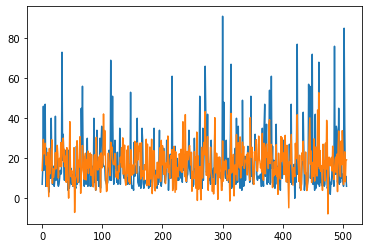

In [100]:
plt.plot(y_test[:])
plt.plot(y_pred[:])

pd.DataFrame(data=[y_test,])



In [101]:
y_train

[30,
 14,
 14,
 9,
 16,
 7,
 7,
 16,
 6,
 7,
 6,
 14,
 16,
 6,
 12,
 49,
 22,
 16,
 23,
 23,
 9,
 13,
 13,
 8,
 18,
 8,
 16,
 27,
 11,
 10,
 20,
 9,
 20,
 15,
 5,
 8,
 31,
 10,
 18,
 14,
 42,
 5,
 10,
 16,
 12,
 15,
 7,
 5,
 9,
 4,
 4,
 11,
 29,
 9,
 19,
 10,
 108,
 14,
 9,
 17,
 18,
 8,
 11,
 14,
 11,
 35,
 27,
 10,
 25,
 7,
 7,
 7,
 10,
 24,
 7,
 13,
 5,
 5,
 11,
 15,
 9,
 8,
 13,
 68,
 23,
 28,
 0,
 6,
 8,
 23,
 98,
 18,
 6,
 16,
 26,
 50,
 20,
 18,
 6,
 22,
 23,
 46,
 7,
 7,
 4,
 9,
 68,
 13,
 11,
 12,
 5,
 17,
 10,
 11,
 15,
 7,
 15,
 5,
 9,
 12,
 12,
 6,
 36,
 5,
 25,
 6,
 6,
 6,
 11,
 13,
 5,
 34,
 11,
 24,
 8,
 9,
 43,
 9,
 36,
 7,
 42,
 23,
 42,
 9,
 11,
 35,
 6,
 28,
 23,
 29,
 10,
 11,
 19,
 6,
 11,
 33,
 7,
 7,
 21,
 23,
 6,
 3,
 0,
 12,
 49,
 8,
 12,
 6,
 17,
 27,
 10,
 16,
 8,
 14,
 16,
 10,
 13,
 15,
 19,
 15,
 9,
 13,
 31,
 24,
 5,
 28,
 9,
 7,
 15,
 26,
 15,
 18,
 8,
 13,
 7,
 36,
 15,
 5,
 7,
 15,
 5,
 22,
 22,
 13,
 10,
 10,
 26,
 10,
 8,
 73,
 10,
 11,
 7,
 6,
 6,
 

In [102]:
y_pred[11]

0.8184196169347615

In [106]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor 

model = KNeighborsRegressor(n_neighbors = 20)
reg = model.fit(x_train, y_train)
reg.score(x_train, y_train)
y_pred = reg.predict(x_test)
mean_squared_error(y_test,y_pred)

167.60860946745564

In [110]:
y_pred[-1]

18.45

In [109]:
x_test['publication_year']

0      2013
1      2014
2      2012
3      2012
4      2016
       ... 
502    2015
503    2016
504    2010
505    2013
506    2017
Name: publication_year, Length: 507, dtype: int64